In [1]:
from sklearn.manifold import TSNE
from collections import Counter
from six.moves import cPickle
import gensim.models.word2vec as w2v
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import os
import sys
import io
import re
import json
import pickle
import pandas as pd
import gensim

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from yellowbrick.text import TSNEVisualizer
from collections import Counter


import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 


In [3]:
[lib,con,neutral]= pickle.load(open('ibcData.pkl','rb'))

In [4]:
liberal = []
for tree in lib:
    liberal.append(tree.get_words())
conservative = []
for tree in con:
    conservative.append(tree.get_words())
neu = []
for tree in neutral:
    neu.append(tree.get_words())

In [5]:
def clean_text(text):
    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) > 1]
    
    text = " ".join(text)

    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
 
    # Tokenize: Split the sentence into words
    tokens = nltk.word_tokenize(text)
  
    #lemmatize the text   

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    text = " ".join(lemmatized_words)
    return text

# apply the above function to df['text']


In [6]:
class0 = []
for line in liberal:
    
    class0.append(clean_text(line))

In [7]:
class1 = []
for line in conservative:
    class1.append(clean_text(line))

In [8]:
class2 = []
for line in neu:
    class2.append(clean_text(line))

### Creating dataframe concatenating all the subsets

In [9]:
liberals = pd.DataFrame(liberal,columns=['text'])
liberals['label'] = 'liberal'
conservatives = pd.DataFrame(conservative,columns=['text'])
conservatives['label'] = 'conservative'
neutrals = pd.DataFrame(neu,columns=['text'])
neutrals['label'] = 'neutral'

In [10]:
frames = [liberals,conservatives]
result = pd.concat(frames)
result = result.sample(frac=1).reset_index(drop=True)

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(result['text'])
label = result['label']

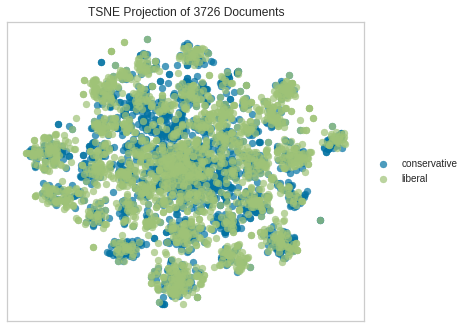

In [12]:
tsne = TSNEVisualizer()
tsne.fit(X,label)
tsne.poof()

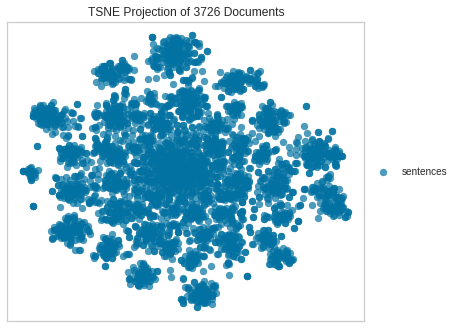

In [13]:
# Don't color points with their classes
tsne = TSNEVisualizer(labels=["sentences"])
tsne.fit(X)
tsne.poof()

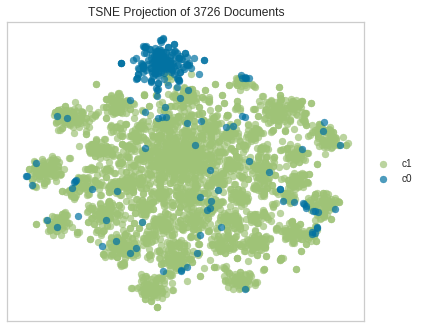

In [14]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2)
clusters.fit(X)

tsne = TSNEVisualizer()
tsne.fit(X, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

#c0 = liberal
#c1 = conservative
#c2 = neutral
